In [1]:
#importing all the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data
data = pd.read_csv("Book1.csv")
data.head(4)

,review,sentiment,Genre
0,One of the other reviewers has mentioned that ...,positive,other
1,A wonderful little production. <br /><br />The...,positive,comedy
2,I thought this was a wonderful way to spend ti...,positive,thriller
3,Basically there's a family where a little boy ...,negative,thriller


In [4]:
#getting the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     19 non-null     object
 1   sentiment  19 non-null     object
 2   Genre      19 non-null     object
dtypes: object(3)
memory usage: 584.0+ bytes


In [5]:
# finding the count of each sentiment
data.sentiment.value_counts()

negative    10
positive     9
Name: sentiment, dtype: int64

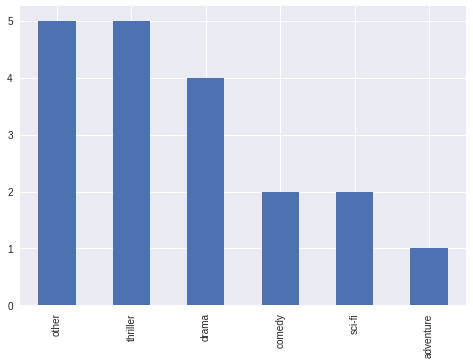

In [6]:
#visualizing th sentiments 
plt.style.use('seaborn')
data['Genre'].value_counts().plot(kind='bar')
plt.show()

In [7]:
#replacing the categorical variables with numericals i.e., encoding the labels
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',0,inplace=True)
genre_mapping = {'other': 0, 'action': 1, 'romance': 2, 'horror': 3, 'sci-fi': 4, 'comedy': 5,'thriller': 6, 'drama': 7,'adventure': 8}
data['Genre'] = data['Genre'].map(genre_mapping)
data.head(10)

,review,sentiment,Genre
0,One of the other reviewers has mentioned that ...,1,0
1,A wonderful little production. <br /><br />The...,1,5
2,I thought this was a wonderful way to spend ti...,1,6
3,Basically there's a family where a little boy ...,0,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,7
5,"Probably my all-time favorite movie, a story o...",1,7
6,"This show was an amazing, fresh & innovative i...",0,8
7,Encouraged by the positive comments about this...,0,0
8,If you like original gut wrenching laughter yo...,1,5
9,Phil the Alien is one of those quirky films wh...,0,4


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#Data Cleaning
from nltk.stem import PorterStemmer
import re
import nltk
from nltk.corpus import stopwords

corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= data['review'][i]) #removing special characters
    text = text.lower() #converting to lower case
    text = text.split() 
    text = [ words for words in text if words not in set(stopwords.words('english'))]
  #  text = [ps.stem(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)

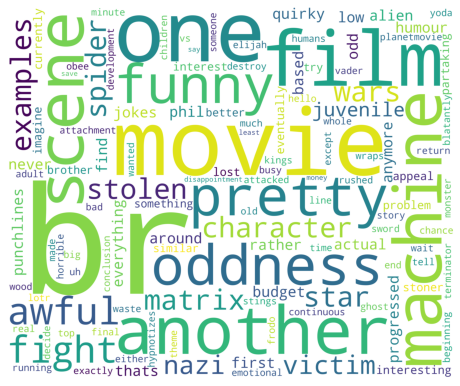

In [10]:
# Finding what type of words are present in each genre
other_words = []
drama_words = []
thriller_words = []

for i in list(data[data['Genre']==4].index):
    other_words.append(corpus[i])

for i in list(data[data['Genre']==6].index):
    thriller_words.append(corpus[i])

other = ''
thriller = ''
for i in range(0,2):
    other += other_words[i]
    thriller += thriller_words[i]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=3000, height=2500).generate(other)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [11]:
#bag of words model
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (19, 1000)
y.shape =  (19,)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
Z = cv.fit_transform(corpus).toarray()
z=data['Genre'].values

In [13]:
#Splitting the data
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)

In [15]:
#training the model with 3 different algorithms
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)

BernoulliNB()

In [16]:
#testing the models
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))
print("Bernoulli = ",accuracy_score(testy,ypb))

Gaussian =  0.5
Multinomial =  0.5
Bernoulli =  0.25


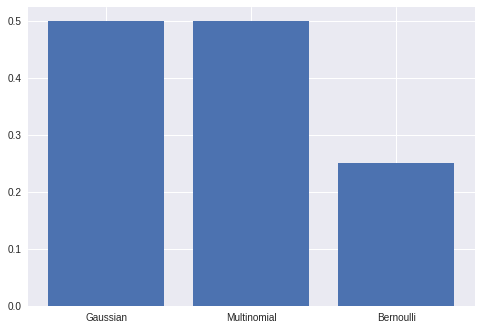

In [17]:
#visualizing the models
plt.style.use('seaborn')
plt.bar(['Gaussian','Multinomial','Bernoulli'],[accuracy_score(testy,ypg),accuracy_score(testy,ypm),accuracy_score(testy,ypb)])
plt.show()

In [18]:
#using the multinomial model for predictions
y_pred = mnb.predict(testx)

In [19]:
#finding the accuarcy of the model
from sklearn.metrics import accuracy_score
score_ = accuracy_score(testy[:2], y_pred[:2])
print("Accuracy score is: {}%".format(round(score_*100,2)))

Accuracy score is: 50.0%
